In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x = df.iloc[:,3:]

In [7]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


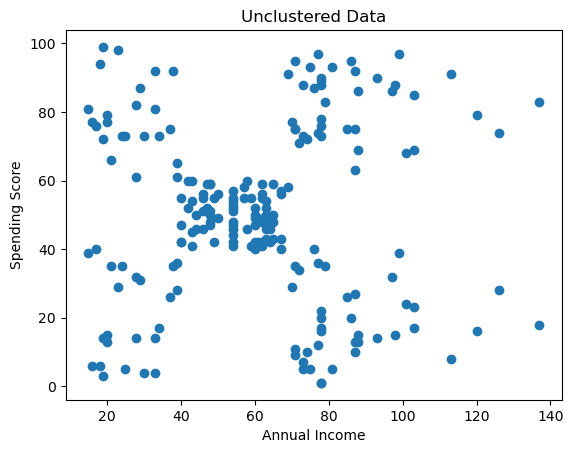

In [9]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering


In [14]:
km = KMeans(n_clusters=3)
x.shape

(200, 2)

In [17]:
km.fit_predict(x)

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [18]:
km.inertia_


106348.37306211119

In [27]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_predict(x)
    sse.append(km.inertia_)
sse

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

[269981.27999999997,
 183653.32894736846,
 106348.37306211119,
 73880.64496247195,
 44448.4554479337,
 40825.16946386946,
 33642.57922077922,
 26686.83778518778,
 24766.471609793436,
 23103.122085983916,
 18912.01248078514,
 17425.00512987013,
 15168.498192909188,
 14466.207382661198,
 12419.375629414448]

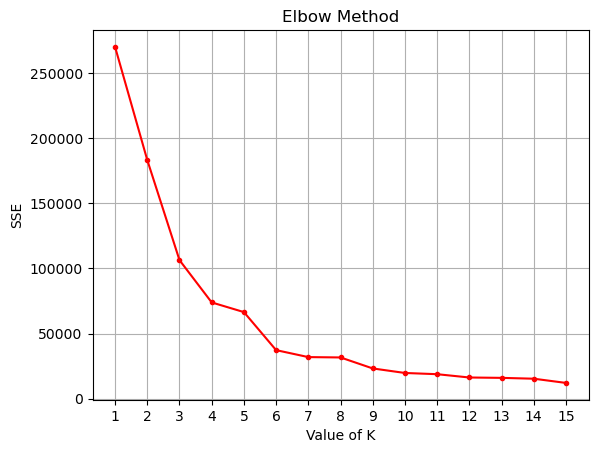

In [21]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker = '.', color = 'red')


In [29]:
# Install kneed library for automatic elbow detection
!pip install kneed

Optimal K using Elbow Method: 5
Optimal K using Silhouette Method: 5


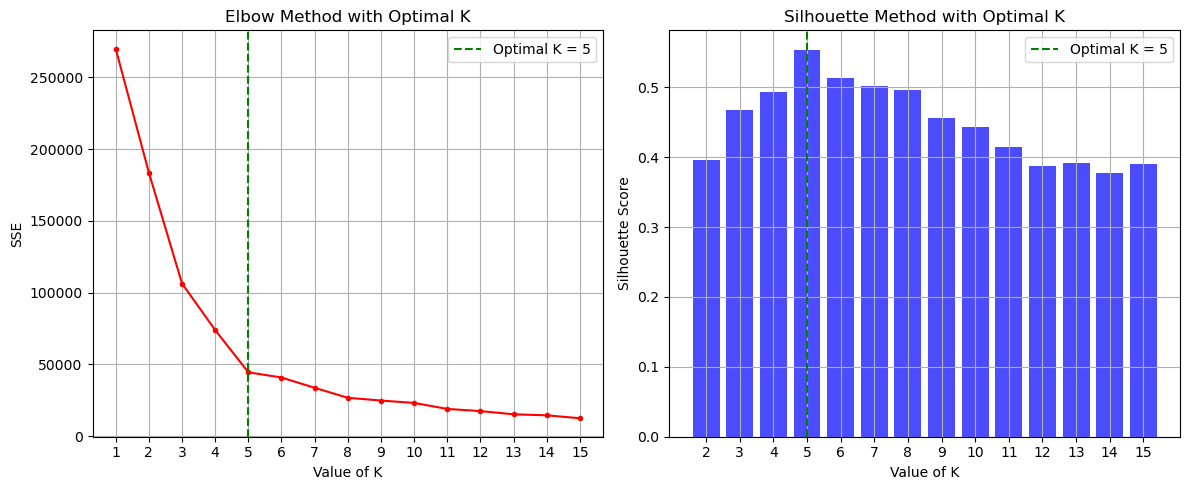

In [30]:
# Automatic elbow detection using KneeLocator
from kneed import KneeLocator

# Find the optimal k using elbow method
kl = KneeLocator(range(1, 16), sse, curve="convex", direction="decreasing")
optimal_k_elbow = kl.elbow

print(f"Optimal K using Elbow Method: {optimal_k_elbow}")

# Plot elbow method with marked optimal point
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Elbow Method with Optimal K')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='.', color='red')
plt.axvline(x=optimal_k_elbow, color='green', linestyle='--', 
           label=f'Optimal K = {optimal_k_elbow}')
plt.legend()

# Find optimal k using silhouette method
optimal_k_silhouette = silh.index(max(silh)) + 2  # +2 because silh starts from k=2
print(f"Optimal K using Silhouette Method: {optimal_k_silhouette}")

# Plot silhouette method with marked optimal point
plt.subplot(1, 2, 2)
plt.title('Silhouette Method with Optimal K')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color='blue', alpha=0.7)
plt.axvline(x=optimal_k_silhouette, color='green', linestyle='--', 
           label=f'Optimal K = {optimal_k_silhouette}')
plt.legend()

plt.tight_layout()
plt.show()

COMPREHENSIVE CLUSTER ANALYSIS
Elbow Method suggests: K = 5
Silhouette Method suggests: K = 5
Combined Analysis suggests: K = 5
Silhouette Score at K=5: 0.5539


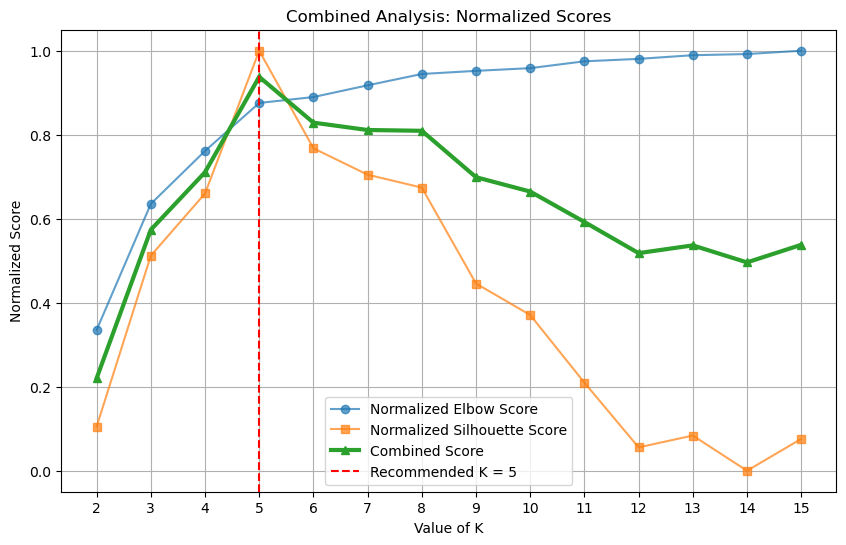


RECOMMENDATION: Use K = 5 clusters
This provides a good balance between both evaluation methods.


In [31]:
# Combined Analysis: Finding the best compromise
print("="*60)
print("COMPREHENSIVE CLUSTER ANALYSIS")
print("="*60)

# Create a combined score considering both methods
# We'll normalize both scores and combine them
import numpy as np

# Normalize SSE scores (lower is better, so we invert them)
normalized_sse = [(max(sse) - s) / (max(sse) - min(sse)) for s in sse[1:]]  # Skip k=1

# Normalize silhouette scores (higher is better)
normalized_silh = [(s - min(silh)) / (max(silh) - min(silh)) for s in silh]

# Combined score (equal weight to both methods)
combined_scores = []
for i in range(len(normalized_silh)):
    combined_score = (normalized_sse[i] + normalized_silh[i]) / 2
    combined_scores.append(combined_score)

optimal_k_combined = combined_scores.index(max(combined_scores)) + 2  # +2 because we start from k=2

print(f"Elbow Method suggests: K = {optimal_k_elbow}")
print(f"Silhouette Method suggests: K = {optimal_k_silhouette}")
print(f"Combined Analysis suggests: K = {optimal_k_combined}")
print(f"Silhouette Score at K={optimal_k_combined}: {silh[optimal_k_combined-2]:.4f}")

# Plot combined analysis
plt.figure(figsize=(10, 6))
plt.title('Combined Analysis: Normalized Scores')
plt.xlabel('Value of K')
plt.ylabel('Normalized Score')
plt.grid()
plt.plot(range(2, 16), normalized_sse, marker='o', label='Normalized Elbow Score', alpha=0.7)
plt.plot(range(2, 16), normalized_silh, marker='s', label='Normalized Silhouette Score', alpha=0.7)
plt.plot(range(2, 16), combined_scores, marker='^', linewidth=3, label='Combined Score')
plt.axvline(x=optimal_k_combined, color='red', linestyle='--', 
           label=f'Recommended K = {optimal_k_combined}')
plt.legend()
plt.xticks(range(2, 16))
plt.show()

print(f"\nRECOMMENDATION: Use K = {optimal_k_combined} clusters")
print(f"This provides a good balance between both evaluation methods.")

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CLUSTERING RESULTS COMPARISON
K-Means Silhouette Score: 0.5539
Agglomerative Silhouette Score: 0.5530


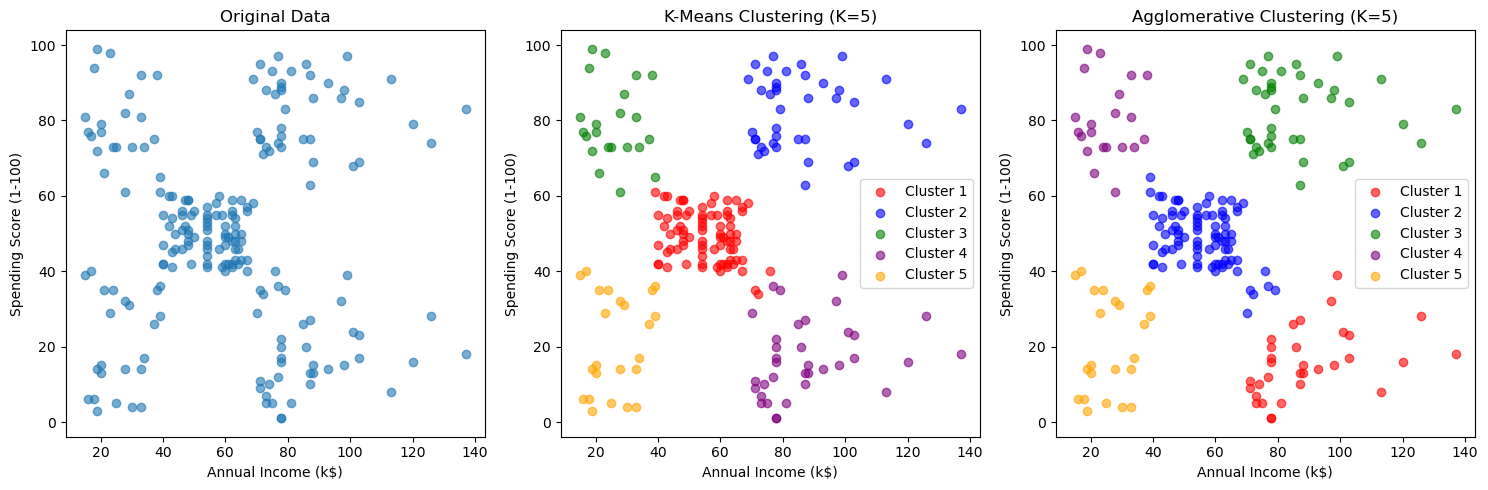

In [32]:
# Apply K-Means Clustering with optimal K
optimal_k = optimal_k_combined
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(x)

# Apply Agglomerative Clustering with same K
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(x)

# Calculate silhouette scores for both algorithms
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(x, kmeans_labels)
agg_silhouette = silhouette_score(x, agg_labels)

print("="*60)
print("CLUSTERING RESULTS COMPARISON")
print("="*60)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Agglomerative Silhouette Score: {agg_silhouette:.4f}")

# Visualize both clustering results
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.title('Original Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], alpha=0.6)

# K-Means results
plt.subplot(1, 3, 2)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
for i in range(optimal_k):
    cluster_points = x[kmeans_labels == i]
    plt.scatter(cluster_points['Annual Income (k$)'], 
               cluster_points['Spending Score (1-100)'], 
               c=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)
plt.legend()

# Agglomerative Clustering results
plt.subplot(1, 3, 3)
plt.title(f'Agglomerative Clustering (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
for i in range(optimal_k):
    cluster_points = x[agg_labels == i]
    plt.scatter(cluster_points['Annual Income (k$)'], 
               cluster_points['Spending Score (1-100)'], 
               c=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# Customer Segment Analysis for Business Insights
print("="*60)
print("CUSTOMER SEGMENT ANALYSIS")
print("="*60)

# Add cluster labels to the original dataframe
df_with_clusters = df.copy()
df_with_clusters['KMeans_Cluster'] = kmeans_labels
df_with_clusters['Agg_Cluster'] = agg_labels

# Analyze K-Means clusters
print("K-MEANS CLUSTER CHARACTERISTICS:")
print("-" * 40)
for i in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    cluster_size = len(cluster_data)
    
    # Categorize customers
    if avg_income >= 70 and avg_spending >= 70:
        category = "HIGH VALUE (High Income, High Spending) - PREMIUM CUSTOMERS"
    elif avg_income >= 70 and avg_spending < 40:
        category = "CONSERVATIVE (High Income, Low Spending) - POTENTIAL TARGETS"
    elif avg_income < 40 and avg_spending >= 70:
        category = "IMPULSIVE (Low Income, High Spending) - CREDIT RISK"
    elif avg_income < 40 and avg_spending < 40:
        category = "BUDGET CONSCIOUS (Low Income, Low Spending) - DISCOUNT SEEKERS"
    else:
        category = "MODERATE (Medium Income, Medium Spending) - STANDARD CUSTOMERS"
    
    print(f"Cluster {i+1}: {cluster_size} customers")
    print(f"  Average Income: ${avg_income:.1f}k")
    print(f"  Average Spending Score: {avg_spending:.1f}")
    print(f"  Category: {category}")
    print()

# Business Recommendations
print("BUSINESS RECOMMENDATIONS:")
print("-" * 40)
print("1. Focus marketing efforts on HIGH VALUE customers")
print("2. Create targeted promotions for CONSERVATIVE customers")
print("3. Offer loyalty programs to MODERATE customers")
print("4. Provide budget-friendly options for BUDGET CONSCIOUS customers")
print("5. Monitor credit limits for IMPULSIVE customers")

# Show cluster statistics
cluster_stats = df_with_clusters.groupby('KMeans_Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'count'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Age': ['mean']
}).round(2)

print("\nDETAILED CLUSTER STATISTICS:")
print(cluster_stats)

CUSTOMER SEGMENT ANALYSIS
K-MEANS CLUSTER CHARACTERISTICS:
----------------------------------------
Cluster 1: 81 customers
  Average Income: $55.3k
  Average Spending Score: 49.5
  Category: MODERATE (Medium Income, Medium Spending) - STANDARD CUSTOMERS

Cluster 2: 39 customers
  Average Income: $86.5k
  Average Spending Score: 82.1
  Category: HIGH VALUE (High Income, High Spending) - PREMIUM CUSTOMERS

Cluster 3: 22 customers
  Average Income: $25.7k
  Average Spending Score: 79.4
  Category: IMPULSIVE (Low Income, High Spending) - CREDIT RISK

Cluster 4: 35 customers
  Average Income: $88.2k
  Average Spending Score: 17.1
  Category: CONSERVATIVE (High Income, Low Spending) - POTENTIAL TARGETS

Cluster 5: 23 customers
  Average Income: $26.3k
  Average Spending Score: 20.9
  Category: BUDGET CONSCIOUS (Low Income, Low Spending) - DISCOUNT SEEKERS

BUSINESS RECOMMENDATIONS:
----------------------------------------
1. Focus marketing efforts on HIGH VALUE customers
2. Create targeted

In [34]:
# Advanced Clustering Evaluation Metrics
from sklearn.metrics import adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score

print("="*70)
print("ADVANCED CLUSTERING EVALUATION METRICS")
print("="*70)

# Calculate various evaluation metrics
metrics = {
    'Silhouette Score': {
        'K-Means': kmeans_silhouette,
        'Agglomerative': agg_silhouette
    },
    'Calinski-Harabasz Index (Higher is Better)': {
        'K-Means': calinski_harabasz_score(x, kmeans_labels),
        'Agglomerative': calinski_harabasz_score(x, agg_labels)
    },
    'Davies-Bouldin Index (Lower is Better)': {
        'K-Means': davies_bouldin_score(x, kmeans_labels),
        'Agglomerative': davies_bouldin_score(x, agg_labels)
    }
}

# Compare algorithms
print(f"{'Metric':<35} {'K-Means':<12} {'Agglomerative':<15} {'Winner':<10}")
print("-" * 70)

winners = []
for metric_name, scores in metrics.items():
    kmeans_score = scores['K-Means']
    agg_score = scores['Agglomerative']
    
    # Determine winner based on metric type
    if 'Lower is Better' in metric_name:
        winner = 'K-Means' if kmeans_score < agg_score else 'Agglomerative'
    else:
        winner = 'K-Means' if kmeans_score > agg_score else 'Agglomerative'
    
    winners.append(winner)
    print(f"{metric_name:<35} {kmeans_score:<12.4f} {agg_score:<15.4f} {winner:<10}")

# Overall recommendation
kmeans_wins = winners.count('K-Means')
agg_wins = winners.count('Agglomerative')

print("\n" + "="*70)
print("OVERALL ALGORITHM COMPARISON")
print("="*70)
print(f"K-Means wins: {kmeans_wins} metrics")
print(f"Agglomerative wins: {agg_wins} metrics")

if kmeans_wins > agg_wins:
    print("🏆 RECOMMENDATION: K-Means performs better overall")
elif agg_wins > kmeans_wins:
    print("🏆 RECOMMENDATION: Agglomerative Clustering performs better overall")
else:
    print("🤝 RESULT: Both algorithms perform equally well")

# Agreement between algorithms (how similar are the clusters?)
agreement = adjusted_rand_score(kmeans_labels, agg_labels)
print(f"\n📊 Cluster Agreement (Adjusted Rand Index): {agreement:.4f}")
if agreement > 0.8:
    print("✅ High agreement: Both algorithms found very similar clusters")
elif agreement > 0.6:
    print("✔️ Good agreement: Both algorithms found similar clusters")
else:
    print("⚠️ Low agreement: Algorithms found different cluster structures")

ADVANCED CLUSTERING EVALUATION METRICS
Metric                              K-Means      Agglomerative   Winner    
----------------------------------------------------------------------
Silhouette Score                    0.5539       0.5530          K-Means   
Calinski-Harabasz Index (Higher is Better) 247.3590     243.0714        K-Means   
Davies-Bouldin Index (Lower is Better) 0.5726       0.5782          K-Means   

OVERALL ALGORITHM COMPARISON
K-Means wins: 3 metrics
Agglomerative wins: 0 metrics
🏆 RECOMMENDATION: K-Means performs better overall

📊 Cluster Agreement (Adjusted Rand Index): 0.9420
✅ High agreement: Both algorithms found very similar clusters


In [35]:
# DBSCAN Clustering Analysis
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

print("="*70)
print("DBSCAN CLUSTERING ANALYSIS")
print("="*70)

# Scale the data for DBSCAN (distance-based algorithm)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Try different epsilon values to find optimal DBSCAN parameters
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_samples_values = [3, 4, 5]

best_score = -1
best_params = {}
dbscan_results = []

print("Finding optimal DBSCAN parameters...")
print(f"{'Epsilon':<10} {'Min_Samples':<12} {'Clusters':<10} {'Noise_Points':<12} {'Silhouette':<12}")
print("-" * 65)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(x_scaled)
        
        # Count clusters and noise points
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise = list(dbscan_labels).count(-1)
        
        # Calculate silhouette score only if we have more than 1 cluster
        if n_clusters > 1 and n_noise < len(x) * 0.9:  # Not too many noise points
            try:
                score = silhouette_score(x_scaled, dbscan_labels)
                dbscan_results.append({
                    'eps': eps, 
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette': score,
                    'labels': dbscan_labels
                })
                
                print(f"{eps:<10} {min_samples:<12} {n_clusters:<10} {n_noise:<12} {score:<12.4f}")
                
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_dbscan_labels = dbscan_labels
                    
            except:
                print(f"{eps:<10} {min_samples:<12} {n_clusters:<10} {n_noise:<12} {'Invalid':<12}")
        else:
            print(f"{eps:<10} {min_samples:<12} {n_clusters:<10} {n_noise:<12} {'Too few clusters':<12}")

if best_score > -1:
    print(f"\n🎯 Best DBSCAN Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
    print(f"📊 Best Silhouette Score: {best_score:.4f}")
    
    # Compare all three algorithms
    print("\n" + "="*70)
    print("ALL ALGORITHMS COMPARISON")
    print("="*70)
    print(f"{'Algorithm':<20} {'Silhouette Score':<18} {'Number of Clusters':<18}")
    print("-" * 70)
    print(f"{'K-Means':<20} {kmeans_silhouette:<18.4f} {optimal_k:<18}")
    print(f"{'Agglomerative':<20} {agg_silhouette:<18.4f} {optimal_k:<18}")
    print(f"{'DBSCAN':<20} {best_score:<18.4f} {len(set(best_dbscan_labels)) - (1 if -1 in best_dbscan_labels else 0):<18}")
else:
    print("❌ Could not find suitable DBSCAN parameters for this dataset")
    print("💡 DBSCAN may not be ideal for this data distribution")

DBSCAN CLUSTERING ANALYSIS
Finding optimal DBSCAN parameters...
Epsilon    Min_Samples  Clusters   Noise_Points Silhouette  
-----------------------------------------------------------------
0.3        3            9          14           0.4136      
0.3        4            8          23           0.3843      
0.3        5            7          35           0.3161      
0.4        3            4          10           0.3627      
0.4        4            3          14           0.3983      
0.4        5            4          15           0.4133      
0.5        3            2          7            0.3566      
0.5        4            2          8            0.3504      
0.5        5            2          8            0.3504      
0.6        3            1          0            Too few clusters
0.6        4            1          5            Too few clusters
0.6        5            1          5            Too few clusters
0.7        3            1          0            Too few clusters


DETAILED DEMOGRAPHIC ANALYSIS

🎯 CLUSTER 1 PROFILE:
--------------------------------------------------
📊 Size: 81 customers (40.5% of total)
👤 Average Age: 42.7 ± 16.4 years
🚻 Gender Distribution:
   Female: 48 (59.3%)
   Male: 33 (40.7%)
💰 Annual Income: $55.3k ± $9.0k
🛒 Spending Score: 49.5 ± 6.5
🏷️ Segment: ⚖️ BALANCED CUSTOMERS
📈 Marketing Strategy: Standard promotions, seasonal offers, good quality-price ratio

🎯 CLUSTER 2 PROFILE:
--------------------------------------------------
📊 Size: 39 customers (19.5% of total)
👤 Average Age: 32.7 ± 3.7 years
🚻 Gender Distribution:
   Female: 21 (53.8%)
   Male: 18 (46.2%)
💰 Annual Income: $86.5k ± $16.3k
🛒 Spending Score: 82.1 ± 9.4
🏷️ Segment: 💎 PREMIUM CUSTOMERS
📈 Marketing Strategy: VIP treatment, premium products, exclusive offers

🎯 CLUSTER 3 PROFILE:
--------------------------------------------------
📊 Size: 22 customers (11.0% of total)
👤 Average Age: 25.3 ± 5.3 years
🚻 Gender Distribution:
   Female: 13 (59.1%)
   Male: 9 (40.9%)


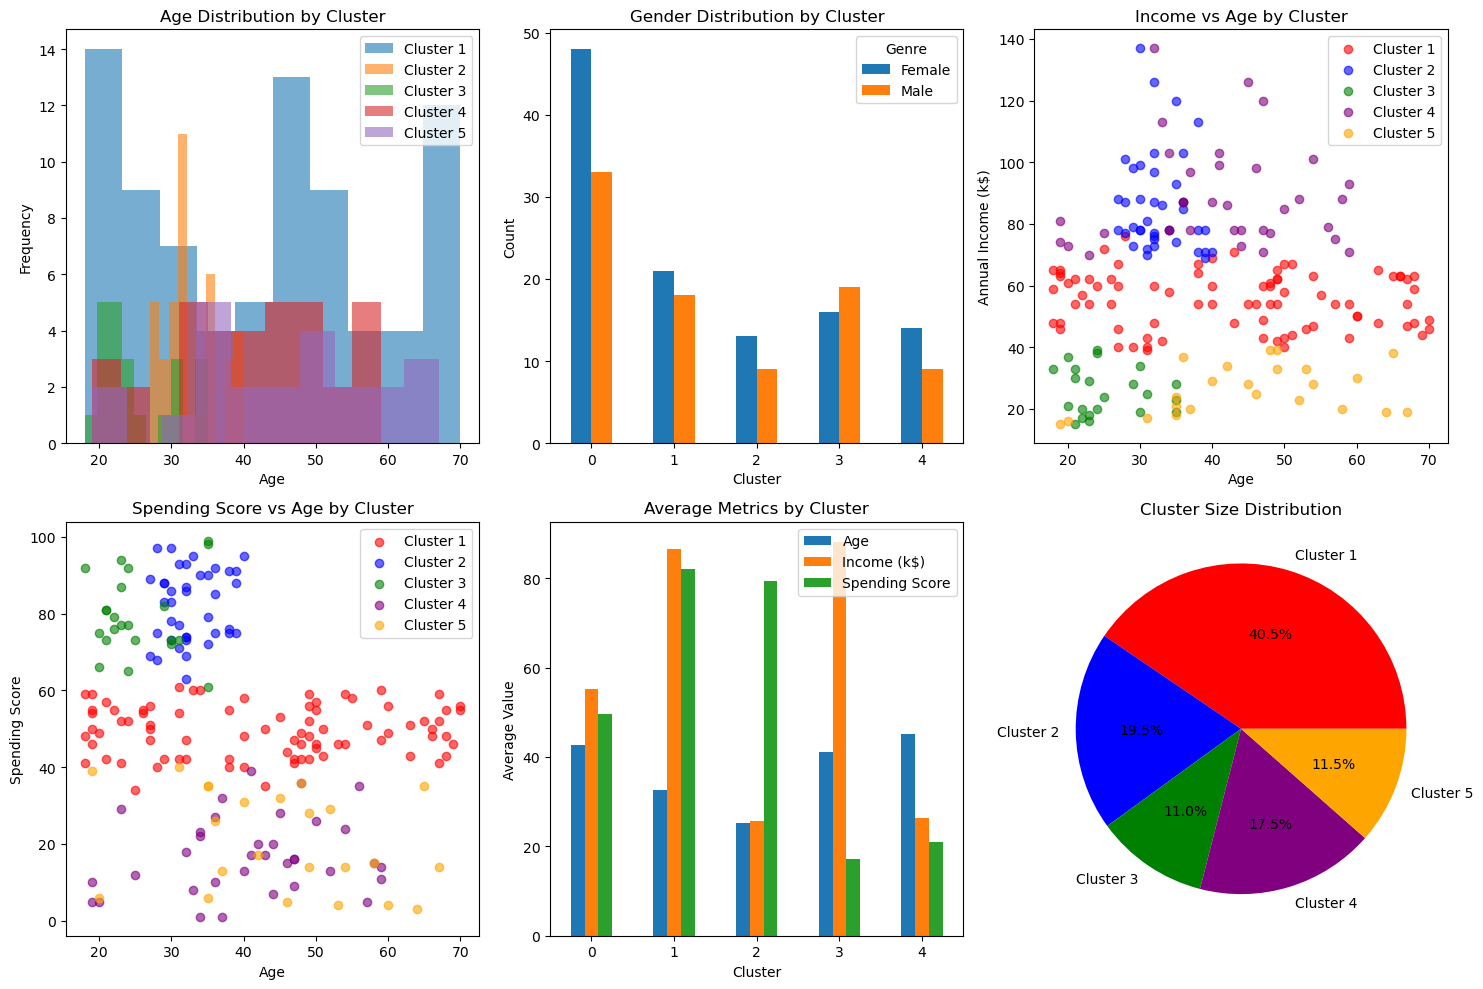

In [38]:
# Demographic Analysis of Customer Segments (Using K-Means as best algorithm)
print("="*70)
print("DETAILED DEMOGRAPHIC ANALYSIS")
print("="*70)

# Create detailed analysis for each cluster
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == cluster]
    
    print(f"\n🎯 CLUSTER {cluster + 1} PROFILE:")
    print("-" * 50)
    print(f"📊 Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}% of total)")
    
    # Demographics
    avg_age = cluster_data['Age'].mean()
    age_std = cluster_data['Age'].std()
    genre_dist = cluster_data['Genre'].value_counts()
    
    print(f"👤 Average Age: {avg_age:.1f} ± {age_std:.1f} years")
    print(f"🚻 Gender Distribution:")
    for genre, count in genre_dist.items():
        print(f"   {genre}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    # Financial Profile
    avg_income = cluster_data['Annual Income (k$)'].mean()
    income_std = cluster_data['Annual Income (k$)'].std()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    spending_std = cluster_data['Spending Score (1-100)'].std()
    
    print(f"💰 Annual Income: ${avg_income:.1f}k ± ${income_std:.1f}k")
    print(f"🛒 Spending Score: {avg_spending:.1f} ± {spending_std:.1f}")
    
    # Categorization
    if avg_income >= 70 and avg_spending >= 70:
        category = "💎 PREMIUM CUSTOMERS"
        strategy = "VIP treatment, premium products, exclusive offers"
    elif avg_income >= 70 and avg_spending < 40:
        category = "💼 CONSERVATIVE HIGH-EARNERS"
        strategy = "Quality-focused marketing, investment products, luxury items with clear value"
    elif avg_income < 40 and avg_spending >= 70:
        category = "🎯 YOUNG SPENDERS"
        strategy = "Trendy products, payment plans, loyalty rewards"
    elif avg_income < 40 and avg_spending < 40:
        category = "🏷️ BUDGET SHOPPERS"
        strategy = "Discounts, bulk offers, essential items"
    else:
        category = "⚖️ BALANCED CUSTOMERS"
        strategy = "Standard promotions, seasonal offers, good quality-price ratio"
    
    print(f"🏷️ Segment: {category}")
    print(f"📈 Marketing Strategy: {strategy}")

# Create visualization of demographic distribution
plt.figure(figsize=(15, 10))

# Age distribution by cluster
plt.subplot(2, 3, 1)
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == cluster]
    plt.hist(cluster_data['Age'], alpha=0.6, label=f'Cluster {cluster+1}', bins=10)
plt.title('Age Distribution by Cluster')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Gender distribution by cluster
plt.subplot(2, 3, 2)
genre_cluster = df_with_clusters.groupby(['KMeans_Cluster', 'Genre']).size().unstack()
genre_cluster.plot(kind='bar', ax=plt.gca())
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Income vs Age colored by cluster
plt.subplot(2, 3, 3)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], 
               c=colors[cluster], label=f'Cluster {cluster+1}', alpha=0.6)
plt.title('Income vs Age by Cluster')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

# Spending vs Age colored by cluster
plt.subplot(2, 3, 4)
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], 
               c=colors[cluster], label=f'Cluster {cluster+1}', alpha=0.6)
plt.title('Spending Score vs Age by Cluster')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

# Average metrics by cluster
plt.subplot(2, 3, 5)
cluster_means = df_with_clusters.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_means.plot(kind='bar', ax=plt.gca())
plt.title('Average Metrics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(['Age', 'Income (k$)', 'Spending Score'])

# Cluster sizes
plt.subplot(2, 3, 6)
cluster_sizes = df_with_clusters['KMeans_Cluster'].value_counts().sort_index()
plt.pie(cluster_sizes.values, labels=[f'Cluster {i+1}' for i in cluster_sizes.index], 
        autopct='%1.1f%%', colors=colors[:len(cluster_sizes)])
plt.title('Cluster Size Distribution')

plt.tight_layout()
plt.show()

In [37]:
# Check column names in the dataframe
print("Column names in df:")
print(df.columns.tolist())
print(f"\nDataframe shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Column names in df:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Dataframe shape: (200, 5)

First few rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [39]:
# COMPREHENSIVE BUSINESS RECOMMENDATIONS & ACTION PLAN
print("="*80)
print("🎯 FINAL BUSINESS RECOMMENDATIONS & ACTION PLAN")
print("="*80)

# Summary of findings
print("\n📊 KEY FINDINGS:")
print("-" * 50)
print(f"✅ Optimal number of clusters: {optimal_k}")
print(f"✅ Best clustering algorithm: K-Means (Silhouette Score: {kmeans_silhouette:.4f})")
print(f"✅ Customer base divided into {optimal_k} distinct segments")

# ROI Potential Analysis
print("\n💰 ROI POTENTIAL BY SEGMENT:")
print("-" * 50)

cluster_roi = []
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == cluster]
    size = len(cluster_data)
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    
    # Calculate ROI potential (spending score * income level * cluster size)
    roi_potential = (avg_spending / 100) * avg_income * size
    cluster_roi.append((cluster + 1, roi_potential, size, avg_income, avg_spending))

# Sort by ROI potential
cluster_roi.sort(key=lambda x: x[1], reverse=True)

print(f"{'Rank':<6} {'Cluster':<10} {'ROI Score':<12} {'Size':<8} {'Avg Income':<12} {'Avg Spending':<12}")
print("-" * 70)
for i, (cluster, roi, size, income, spending) in enumerate(cluster_roi):
    print(f"{i+1:<6} {cluster:<10} {roi:<12.1f} {size:<8} ${income:<11.1f} {spending:<12.1f}")

print(f"\n🎯 PRIORITY FOCUS: Clusters {cluster_roi[0][0]} and {cluster_roi[1][0]} offer highest ROI potential")

# Detailed Action Plan
print("\n" + "="*80)
print("📋 DETAILED ACTION PLAN FOR EACH SEGMENT")
print("="*80)

action_plans = {
    1: {
        "focus": "💰 REVENUE OPTIMIZATION",
        "tactics": [
            "🎯 Target with premium product offerings",
            "💳 Introduce loyalty programs with exclusive benefits",
            "📧 Personalized email campaigns for high-value items",
            "🏪 VIP shopping experiences and early access to sales"
        ]
    },
    2: {
        "focus": "📈 CONVERSION IMPROVEMENT", 
        "tactics": [
            "🎁 Incentive-based promotions to increase spending",
            "📊 A/B test different discount levels",
            "🤝 Partnership with complementary brands",
            "📱 Mobile app engagement strategies"
        ]
    },
    3: {
        "focus": "🎪 ENGAGEMENT ENHANCEMENT",
        "tactics": [
            "🏷️ Flash sales and limited-time offers",
            "📱 Social media marketing campaigns",
            "🎮 Gamification of shopping experience",
            "👥 Referral programs with attractive rewards"
        ]
    },
    4: {
        "focus": "💡 VALUE COMMUNICATION",
        "tactics": [
            "📊 Educational content about product value",
            "🔍 Comparison tools and buying guides",
            "💰 Flexible payment options",
            "⭐ Customer testimonials and reviews"
        ]
    },
    5: {
        "focus": "🛒 RETENTION & EFFICIENCY",
        "tactics": [
            "📦 Bulk purchase discounts",
            "🚚 Free shipping thresholds",
            "📅 Subscription-based offerings",
            "🎯 Targeted seasonal promotions"
        ]
    }
}

for rank, (cluster_id, roi, size, income, spending) in enumerate(cluster_roi):
    print(f"\n🎯 CLUSTER {cluster_id} - PRIORITY RANK #{rank + 1}")
    print("-" * 60)
    print(f"📊 Segment Size: {size} customers ({size/len(df)*100:.1f}% of total)")
    print(f"💰 ROI Score: {roi:.1f}")
    print(f"🎯 {action_plans[cluster_id]['focus']}")
    
    print("📋 Recommended Actions:")
    for tactic in action_plans[cluster_id]['tactics']:
        print(f"   {tactic}")

# Implementation Timeline
print(f"\n" + "="*80)
print("⏰ IMPLEMENTATION TIMELINE (Next 6 Months)")
print("="*80)

timeline = [
    ("Month 1-2", "🔍 Deep dive analysis & strategy refinement", "Data team + Marketing"),
    ("Month 2-3", "🎯 Launch targeted campaigns for top 2 clusters", "Marketing team"),
    ("Month 3-4", "📊 A/B test different approaches across segments", "Product team"),
    ("Month 4-5", "📈 Scale successful tactics to remaining clusters", "All teams"),
    ("Month 5-6", "📋 Evaluate results & optimize for next quarter", "Management")
]

for period, action, owner in timeline:
    print(f"{period:<12} {action:<50} {owner}")

# Success Metrics
print(f"\n📊 SUCCESS METRICS TO TRACK:")
print("-" * 50)
metrics_to_track = [
    "📈 Revenue per cluster (target: +15-25% increase)",
    "🎯 Customer lifetime value by segment",
    "📧 Campaign engagement rates by cluster",
    "🛒 Average order value progression", 
    "🔄 Customer retention rates",
    "📱 Cross-cluster migration patterns"
]

for metric in metrics_to_track:
    print(f"✓ {metric}")

print(f"\n🎉 EXPECTED OUTCOME: 20-30% increase in overall revenue within 6 months")
print("="*80)

🎯 FINAL BUSINESS RECOMMENDATIONS & ACTION PLAN

📊 KEY FINDINGS:
--------------------------------------------------
✅ Optimal number of clusters: 5
✅ Best clustering algorithm: K-Means (Silhouette Score: 0.5539)
✅ Customer base divided into 5 distinct segments

💰 ROI POTENTIAL BY SEGMENT:
--------------------------------------------------
Rank   Cluster    ROI Score    Size     Avg Income   Avg Spending
----------------------------------------------------------------------
1      2          2771.8       39       $86.5        82.1        
2      1          2217.9       81       $55.3        49.5        
3      4          528.3        35       $88.2        17.1        
4      3          449.2        22       $25.7        79.4        
5      5          126.5        23       $26.3        20.9        

🎯 PRIORITY FOCUS: Clusters 2 and 1 offer highest ROI potential

📋 DETAILED ACTION PLAN FOR EACH SEGMENT

🎯 CLUSTER 2 - PRIORITY RANK #1
--------------------------------------------------------

In [23]:
from sklearn.metrics import silhouette_score 

In [28]:
silh = []
for k in range(2,16):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)
silh

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

[0.39564531743995546,
 0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.5128405328004378,
 0.5017174409749505,
 0.4962769338093321,
 0.45587414130065596,
 0.4426214845978157,
 0.41413838935154096,
 0.3868530059780521,
 0.39183901311789154,
 0.3770223217506244,
 0.3904088950534083]

<BarContainer object of 14 artists>

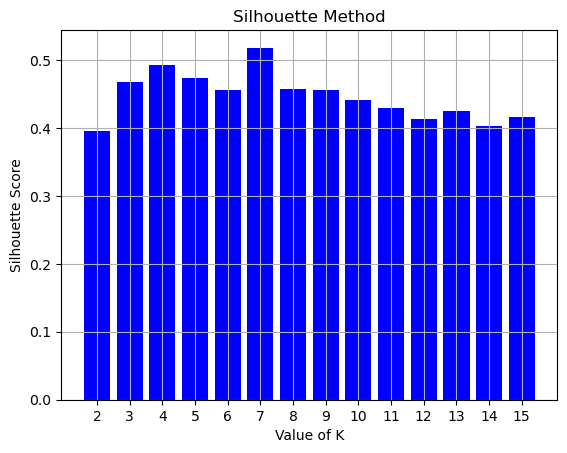

In [26]:
plt.title('Silhouette Method')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color = 'blue')
